导包和基础设置

In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import gc

# 设置matplotlib参数，避免警告
plt.rcParams['figure.max_open_warning'] = 0

# 简化的数据集类
class SimpleFoodDataset:
    def __init__(self, path):
        self.path = path
        self.files = sorted([os.path.join(path, x) for x in os.listdir(path) if x.endswith(".jpg")])
        print(f"找到 {len(self.files)} 张图片")

# 创建数据集
_dataset_dir = "./food11"
train_set = SimpleFoodDataset(os.path.join(_dataset_dir, "training"))

# 通用显示函数
def show_augmentation_effects(transform_func, title, num_images=10):
    """显示数据增强效果，每5张一行"""
    plt.close('all')  # 清理之前的图形
    
    # 取前num_images张图片
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    for i in range(num_images):
        # 计算行列位置
        row = i // 5
        col = i % 5
        
        # 读取第i张原始图片
        img_path = train_set.files[i]
        original_img = Image.open(img_path).convert('RGB')
        
        # 应用数据增强
        if transform_func is None:
            # 显示原始图片
            display_img = original_img.resize((128, 128))
            axes[row, col].imshow(display_img)
        else:
            # 应用变换
            augmented = transform_func(original_img)
            # 转换为可显示格式
            if isinstance(augmented, torch.Tensor):
                display_img = augmented.permute(1, 2, 0).clamp(0, 1)
            else:
                display_img = augmented
            axes[row, col].imshow(display_img)
        
        # 设置标题和样式
        axes[row, col].set_title(f'Image {i+1}', fontsize=10)
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 清理内存
    plt.close(fig)
    gc.collect()

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")    

找到 9866 张图片


保守数据增强

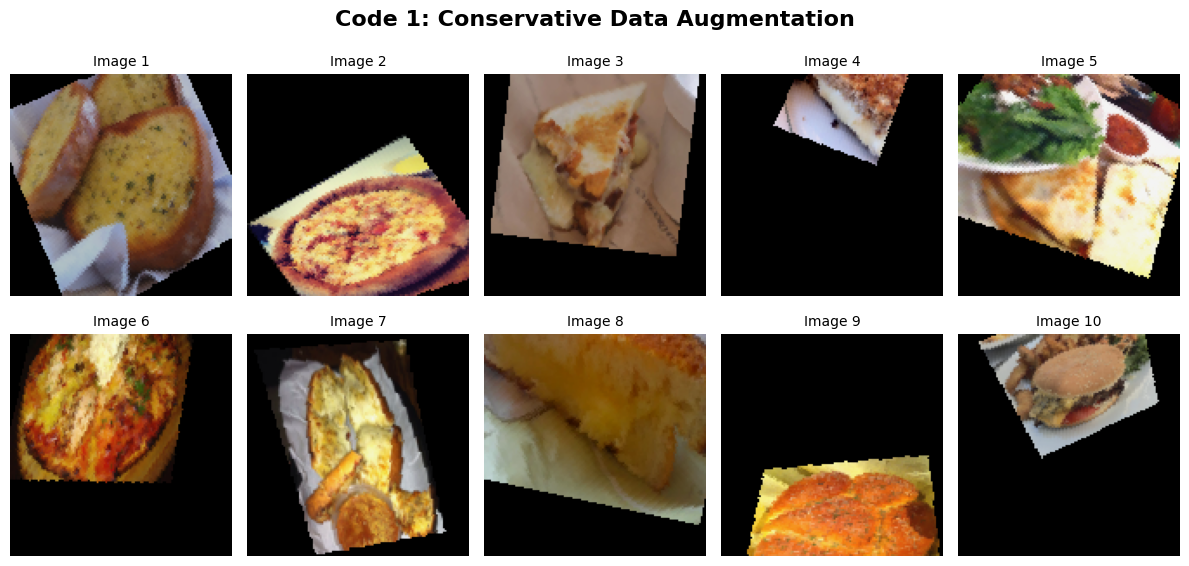

In [2]:
# 保守的数据增强
conservative_tfm = transforms.Compose([
    transforms.Resize((128, 128)),                    # 调整大小
    transforms.RandomHorizontalFlip(p=0.5),          # 50%概率水平翻转
    transforms.ColorJitter(brightness=0.2,           # 轻微颜色调整
                          contrast=0.2, 
                          saturation=0.1, 
                          hue=0),
    transforms.RandomPerspective(distortion_scale=0.6, p=0.6),  # 60%概率透视变换
    transforms.RandomAffine(degrees=(-30, 30),       # 旋转±30度
                           translate=(0, 0.4),        # 垂直移动最多40%
                           scale=(0.8, 1.5)),        # 缩放0.8-1.5倍
    transforms.ToTensor(),                           # 转为张量
])

show_augmentation_effects(conservative_tfm, "Code 1: Conservative Data Augmentation")

激进数据增强

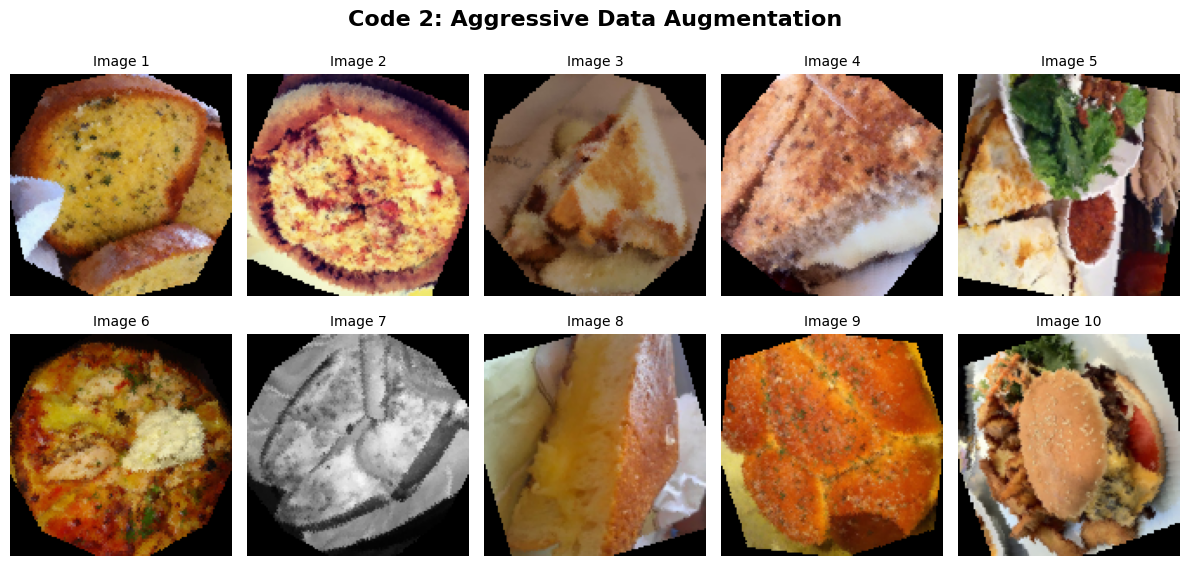

In [3]:
# 激进的数据增强
aggressive_tfm = transforms.Compose([
    transforms.RandomResizedCrop((128, 128),         # 随机裁剪+调整大小
                                scale=(0.7, 1.0)),   # 裁剪70%-100%面积
    transforms.RandomHorizontalFlip(0.5),            # 50%概率水平翻转
    transforms.RandomVerticalFlip(0.5),              # 50%概率垂直翻转⚠️
    transforms.RandomRotation(180),                   # 旋转±180度⚠️
    transforms.RandomAffine(degrees=30),              # 旋转±30度
    transforms.RandomGrayscale(p=0.2),               # 20%概率变灰度⚠️
    transforms.ToTensor(),
])

show_augmentation_effects(aggressive_tfm, "Code 2: Aggressive Data Augmentation")